# Aplicación del Modelo NEURALPROPHET

## Importación de Librerias

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
from zipfile import ZipFile
from neuralprophet import NeuralProphet

In [49]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.family'] = 'Trebuchet MS'

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')


#Metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

## Carga de los Datos

In [50]:
df = pd.read_csv(r'C:\Users\Frode\Documents\Cursos\Skillstech\WALMARTSALESFORECASTING\Dataset\Walmart_Store_sales.csv', encoding = 'utf-8')

## Preprocesamiento de los Datos

In [51]:
df['Date'] = pd.to_datetime(df['Date'])

In [52]:
#df = df[df.Date.dt.day_of_week == 4]

### Arreglo de los datos en dos columnas para el desarrollo del modelo

In [53]:
dfall = df[['Date','Weekly_Sales']]
dfall = dfall.groupby('Date').sum()
dfall.reset_index(inplace = True)

In [54]:
dfall.columns=['ds','y'] #Rename columns
dfall

,ds,y
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


## Separación de los Datos en Train y Test

In [55]:
y_train = dfall.iloc[:120]
y_test = dfall.iloc[120:]

In [56]:
print(y_train)

            ds            y
0   2010-01-10  42239875.87
1   2010-02-04  50423831.26
2   2010-02-07  48917484.50
3   2010-02-19  48276993.78
4   2010-02-26  43968571.13
..         ...          ...
115 2012-04-27  43716798.89
116 2012-05-10  47566639.31
117 2012-05-18  46823939.22
118 2012-05-25  47892463.31
119 2012-06-01  44955421.95

[120 rows x 2 columns]


## Entrenamiento del Modelo

In [57]:
model = NeuralProphet()

In [58]:
model.fit(y_train, freq="W-FRI")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 44.167% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq W-FRI. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 482
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (8) is too small than the required number for the learning rate fi

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,19742480.00,22852986.0,0.629094,0.0,0
1,19122196.00,22411972.0,0.604449,0.0,1
2,19427860.00,22608818.0,0.617896,0.0,2
3,18658012.00,21974916.0,0.583858,0.0,3
4,18770888.00,22022164.0,0.584622,0.0,4
...,...,...,...,...,...
477,2589861.50,4003954.0,0.027834,0.0,477
478,2766223.00,4445724.0,0.033667,0.0,478
479,2667401.25,4375707.0,0.029039,0.0,479
480,2608422.00,4160838.5,0.027865,0.0,480


## Generación de la Predicción

In [59]:
#predicted = model.predict(y_train)
predicted = model.make_future_dataframe(y_train, periods=52)
#forecast = model.predict(y_train)
forecast = model.predict(predicted)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 44.167% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq W-FRI. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [60]:
model.plot(forecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'd490daca-a116-46ca-a577-e5d344c137df',
              'x': array([datetime.datetime(2012, 6, 8, 0, 0),
                          datetime.datetime(2012, 6, 15, 0, 0),
                          datetime.datetime(2012, 6, 22, 0, 0),
                          datetime.datetime(2012, 6, 29, 0, 0),
                          datetime.datetime(2012, 7, 6, 0, 0),
                          datetime.datetime(2012, 7, 13, 0, 0),
                          datetime.datetime(2012, 7, 20, 0, 0),
                          datetime.datetime(2012, 7, 27, 0, 0),
                          datetime.datetime(2012, 8, 3, 0, 0),
                          datetime.datetime(2012, 8, 10, 0, 0),
                          datetime.datetime(2012, 8, 17, 0, 0),
                 

In [61]:
model.plot_components(forecast)

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '6f6d3233-3199-45dd-b0b3-d43d1f265276',
              'x': array([datetime.datetime(2012, 6, 8, 0, 0),
                          datetime.datetime(2012, 6, 15, 0, 0),
                          datetime.datetime(2012, 6, 22, 0, 0),
                          datetime.datetime(2012, 6, 29, 0, 0),
                          datetime.datetime(2012, 7, 6, 0, 0),
                          datetime.datetime(2012, 7, 13, 0, 0),
                          datetime.datetime(2012, 7, 20, 0, 0),
                          datetime.datetime(2012, 7, 27, 0, 0),
                          datetime.datetime(2012, 8, 3, 0, 0),
                          datetime.datetime(2012, 8, 10, 0, 0),
                          datetime.datetime(2012, 8, 17, 0, 0),
                          da

In [62]:
forecast.head(5)

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2012-06-08,None,47890356.0,49220916.0,-3.830372e+04,-1292257.125
1,2012-06-15,None,48082720.0,49235668.0,1.393073e+05,-1292257.125
2,2012-06-22,None,47612324.0,49250420.0,-3.458394e+05,-1292257.125
3,2012-06-29,None,46650876.0,49265172.0,-1.322039e+06,-1292257.125
4,2012-07-06,None,45637980.0,49279924.0,-2.349686e+06,-1292257.125


### Gráfica de la predicción del Modelo

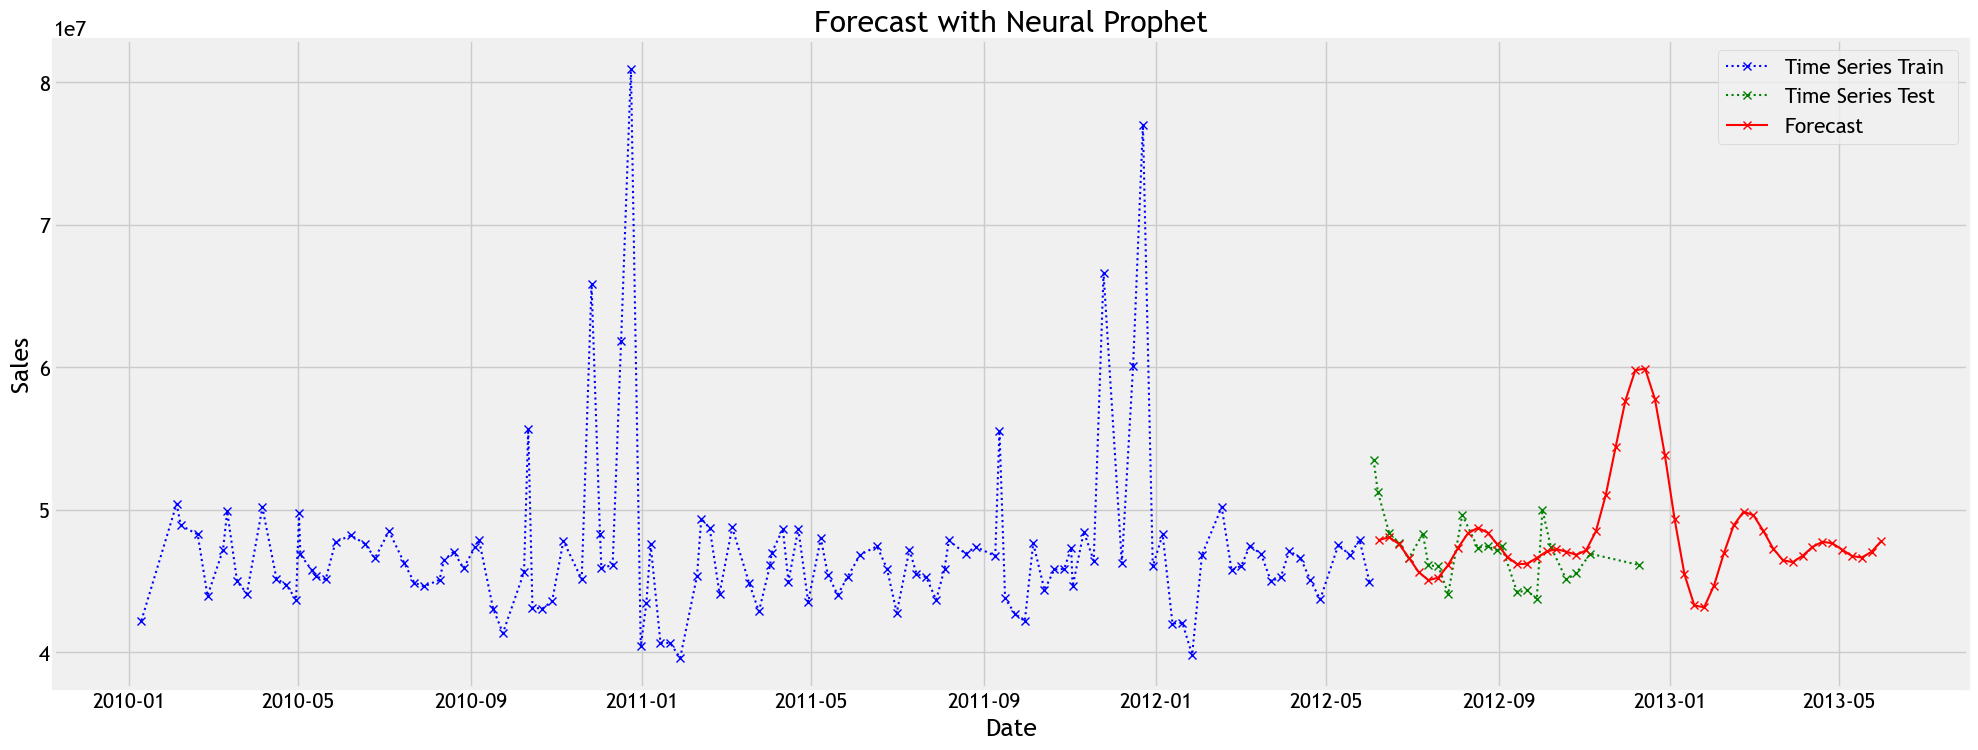

In [63]:
plt.figure(figsize=(22,8))

plt.plot(y_train['ds'], y_train['y'], 'bx:')

plt.plot(y_test['ds'], y_test['y'], 'bx:', color='green')
plt.plot(forecast["ds"], forecast["yhat1"], "bx-", color="red")

plt.legend(['Time Series Train ','Time Series Test','Forecast'])
plt.title("Forecast with Neural Prophet")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

## Métricas Evaluadas

In [64]:
y_pred = forecast['yhat1'].head(len(y_test)).values

In [65]:
mape = mean_absolute_percentage_error(y_test['y'].values, y_pred).round(4)
mae = mean_absolute_error(y_test['y'].values, y_pred).round(4)
mse = mean_squared_error(y_test['y'].values, y_pred).round(4)
r2 = r2_score(y_test['y'].values, y_pred).round(4)
print(f"MAPE: {(mape)*(100)}%")
print(f"MAE: {(mae)}")
print(f"MSE: {(mse)}")
print(f"R2: {(r2)}")

MAPE: 3.61%
MAE: 1717215.7843
MSE: 4644197123614.554
R2: 0.1309


In [74]:
results = [mape, mae, mse, r2]
results

[0.0361, 1717215.7843, 4644197123614.554, 0.1309]

## Gráficas de validación del modelo de predicción

Generación de períodos a evaluar

In [66]:
future = model.make_future_dataframe(y_train, periods=30)
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 44.167% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq W-FRI. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Períodos generados a futuro

In [67]:
df_future = model.make_future_dataframe(y_train, n_historic_predictions=True, periods=54)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 44.167% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq W-FRI. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [68]:
forecast = model.predict(df_future)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 61.494% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq W-FRI. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 61.494% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq W-FRI. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [69]:
model.plot(forecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'abb50d9e-04fc-4b80-8e87-58e0b958a1f9',
              'x': array([datetime.datetime(2010, 1, 10, 0, 0),
                          datetime.datetime(2010, 2, 4, 0, 0),
                          datetime.datetime(2010, 2, 7, 0, 0),
                          datetime.datetime(2010, 2, 19, 0, 0),
                          datetime.datetime(2010, 2, 26, 0, 0),
                          datetime.datetime(2010, 3, 9, 0, 0),
                          datetime.datetime(2010, 3, 12, 0, 0),
                          datetime.datetime(2010, 3, 19, 0, 0),
                          datetime.datetime(2010, 3, 26, 0, 0),
                          datetime.datetime(2010, 4, 6, 0, 0),
                          datetime.datetime(2010, 4, 16, 0, 0),
                  

In [70]:
model.plot_parameters(components=["trend", "seasonality"])

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '08a11b28-0638-47c8-93ed-599f431d7d19',
              'x': array([datetime.datetime(2010, 1, 15, 0, 0),
                          datetime.datetime(2010, 1, 22, 0, 0),
                          datetime.datetime(2010, 1, 29, 0, 0),
                          datetime.datetime(2010, 2, 5, 0, 0),
                          datetime.datetime(2010, 2, 12, 0, 0),
                          datetime.datetime(2010, 2, 19, 0, 0),
                          datetime.datetime(2010, 2, 26, 0, 0),
                          datetime.datetime(2010, 3, 5, 0, 0),
                          datetime.datetime(2010, 3, 12, 0, 0),
                          datetime.datetime(2010, 3, 19, 0, 0),
                          datetime.datetime(2010, 3, 26, 0, 0),
                          dateti